<a href="https://colab.research.google.com/github/omkarmohite123/Task-_7/blob/main/DataPreprocessing_Assignment11_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


**Step 2: Importing dataset**

In [ ]:
#from google.colab import files
#uploaded=files.upload()


In [ ]:
dataset = pd.read_csv('Data.csv')

In [ ]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


**Step 3: Handling the missing data**

replacing Nan value in salary with mean

In [ ]:
dataset["Salary"]=dataset["Salary"].fillna(dataset['Salary'].mean())
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,NaN,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


for missing Age i m seeing relation of age with salary with purchased

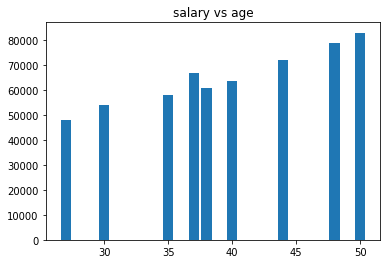

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(dataset['Age'])
y = np.array(dataset['Salary'])

plt.title("salary vs age")
plt.bar(x,y)
plt.show()


In [ ]:
dataset["Age"].fillna(38, inplace = True)
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,38.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [ ]:
X[:, 1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.0, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

**Step 4: Encoding categorical data**

One-Hot Encoding
One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.



In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data =dataset["Country"]
data1=dataset["Purchased"]
values = array(data,data1)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)


['France' 'Spain' 'Germany' 'Spain' 'Germany' 'France' 'Spain' 'France'
 'Germany' 'France']
[0 2 1 2 1 0 2 0 1 0]
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
['France']


**Step 5: Creating a dummy variable**

In [ ]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['Country','Purchased'])
print(one_hot_encoded_data)

    Age        Salary  Country_France  Country_Germany  Country_Spain  \
0  44.0  72000.000000               1                0              0   
1  27.0  48000.000000               0                0              1   
2  30.0  54000.000000               0                1              0   
3  38.0  61000.000000               0                0              1   
4  40.0  63777.777778               0                1              0   
5  35.0  58000.000000               1                0              0   
6  38.0  52000.000000               0                0              1   
7  48.0  79000.000000               1                0              0   
8  50.0  83000.000000               0                1              0   
9  37.0  67000.000000               1                0              0   

   Purchased_No  Purchased_Yes  
0             1              0  
1             0              1  
2             1              0  
3             1              0  
4             0              1 

**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2, random_state = 0)

In [ ]:
X_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
X_test

array([[-1.        ,  2.64575131, -0.77459667],
       [-1.        ,  2.64575131, -0.77459667]])

**Step 7: Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [ ]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[-1.        ,  2.64575131, -0.77459667],
       [ 1.        , -0.37796447, -0.77459667],
       [-1.        , -0.37796447,  1.29099445],
       [-1.        , -0.37796447,  1.29099445],
       [ 1.        , -0.37796447, -0.77459667],
       [-1.        , -0.37796447,  1.29099445],
       [ 1.        , -0.37796447, -0.77459667],
       [ 1.        , -0.37796447, -0.77459667]])

In [ ]:
X_test

array([[-1.        ,  2.64575131, -0.77459667],
       [-1.        ,  2.64575131, -0.77459667]])